# Homework 5 

In [1]:
#imports
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import itertools as it

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [2]:
seed = 42

### Gradient descent and backpropagationg in a simple neural network

did most on paper, but didnt bother writing it into latex

In [3]:
def func(w):
    # task 1 and 2
    # also did it by hand, but had to check
    x = [
        [2,1],
        [-3,2]
    ]
    y = [1.3, 1.9]
    print(w)
    def relu(x):
        return max(0, x)

    def layer1(x, w):
        return relu(x[0] * w[0] + x[1] * w[1] + w[2])

    def output(z, w):
        return z * w[3] + w[4]

    sum = 0
    for xs, ys in zip(x, y):
        z = layer1(xs, w)
        print(f"z:{z}")
        o = output(z, w)
        sum = sum + (o - ys) ** 2
        print(f"guessed value: {o}, actual value: {ys}")

    print(f"mean of mse:{sum/len(y)}")


print("first pass")
w = [1,1,0,1,0]
func(w)

print("\nsecond pass")
# my hand calculated gradient
# may be wrong iunno
w2 = [3.4, 1.7, 1.7, 5.1, -0.2]
w = np.array(w) - 0.01 * np.array(w2)
func(w)

first pass
[1, 1, 0, 1, 0]
z:3
guessed value: 3, actual value: 1.3
z:0
guessed value: 0, actual value: 1.9
mean of mse:3.25

second pass
[ 0.966  0.983 -0.017  0.949  0.002]
z:2.898
guessed value: 2.7522019999999996, actual value: 1.3
z:0
guessed value: 0.002, actual value: 1.9
mean of mse:2.855647324401999


### Neural networks for regression task using scikit-learn

In [4]:
features = np.load("features.npy", allow_pickle=True)
targets = np.load("targets.npy")
print(features.shape, targets.shape)

(4177, 7) (4177, 1)


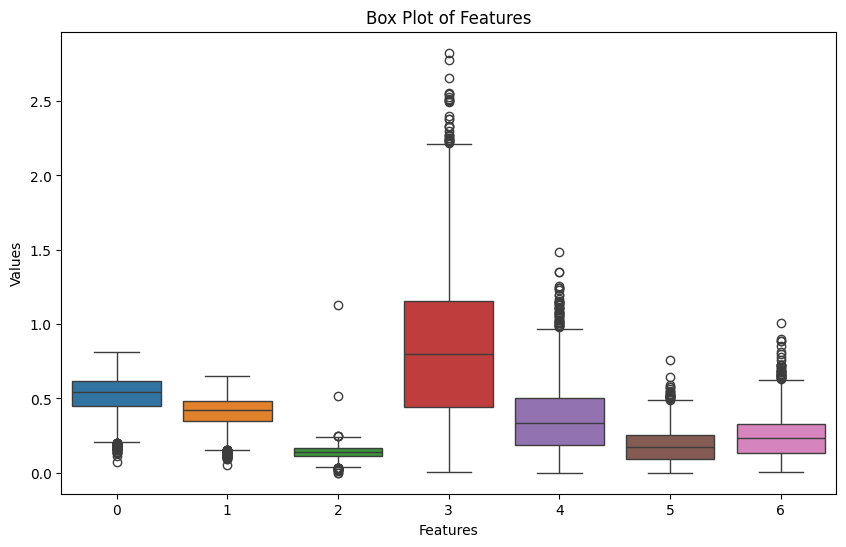

In [5]:
# Distribution plot Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=features)
plt.title('Box Plot of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

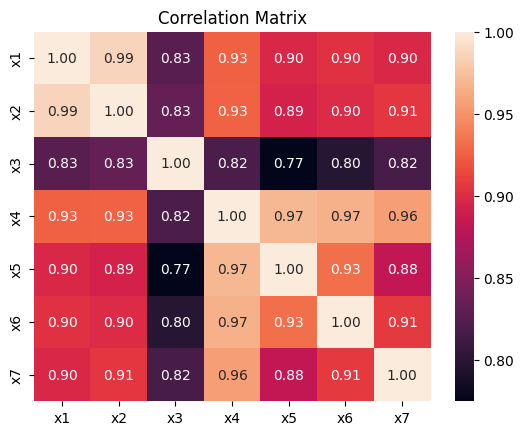

In [6]:
# correlation matrix
R1 = np.corrcoef(features, rowvar=False, dtype=np.float64)
labels = ["x1", "x2", "x3", "x4", "x5", "x6", "x7"]
plt.title("Correlation Matrix")
sns.heatmap(R1, annot=True, fmt=".2f", xticklabels=labels, yticklabels=labels)
plt.show()

In [7]:
X_train, X_val_test, y_train, y_val_test = train_test_split(
    features, targets[:,0], test_size=0.2, random_state=seed)

X_val, X_test, y_val, y_test = train_test_split(
    X_val_test, y_val_test, test_size=0.5, random_state=seed)

In [8]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [9]:
grid = {
    'hidden_layer_sizes': [(20, 3), (37, 3), (50, 3)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [500],
    'alpha': [0.01],
    'momentum': [0.9],
}

iters = it.product(*grid.values())

def func(params):
    model = MLPRegressor(random_state=seed, **dict(zip(grid.keys(), params)))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    return mse

scores = []
print("running grid search")
for params in iters:
    print(params)
    mse = func(params)
    scores.append((params, mse))

print("done")


running grid search
((20, 3), 'logistic', 'sgd', 0.001, 500, 0.01, 0.9)


c:\Users\filli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


((20, 3), 'logistic', 'sgd', 0.01, 500, 0.01, 0.9)
((20, 3), 'logistic', 'sgd', 0.1, 500, 0.01, 0.9)
((20, 3), 'logistic', 'adam', 0.001, 500, 0.01, 0.9)


c:\Users\filli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


((20, 3), 'logistic', 'adam', 0.01, 500, 0.01, 0.9)
((20, 3), 'logistic', 'adam', 0.1, 500, 0.01, 0.9)
((20, 3), 'tanh', 'sgd', 0.001, 500, 0.01, 0.9)
((20, 3), 'tanh', 'sgd', 0.01, 500, 0.01, 0.9)
((20, 3), 'tanh', 'sgd', 0.1, 500, 0.01, 0.9)
((20, 3), 'tanh', 'adam', 0.001, 500, 0.01, 0.9)


c:\Users\filli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


((20, 3), 'tanh', 'adam', 0.01, 500, 0.01, 0.9)
((20, 3), 'tanh', 'adam', 0.1, 500, 0.01, 0.9)
((20, 3), 'relu', 'sgd', 0.001, 500, 0.01, 0.9)
((20, 3), 'relu', 'sgd', 0.01, 500, 0.01, 0.9)
((20, 3), 'relu', 'sgd', 0.1, 500, 0.01, 0.9)
((20, 3), 'relu', 'adam', 0.001, 500, 0.01, 0.9)


c:\Users\filli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


((20, 3), 'relu', 'adam', 0.01, 500, 0.01, 0.9)
((20, 3), 'relu', 'adam', 0.1, 500, 0.01, 0.9)
((37, 3), 'logistic', 'sgd', 0.001, 500, 0.01, 0.9)


c:\Users\filli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


((37, 3), 'logistic', 'sgd', 0.01, 500, 0.01, 0.9)
((37, 3), 'logistic', 'sgd', 0.1, 500, 0.01, 0.9)
((37, 3), 'logistic', 'adam', 0.001, 500, 0.01, 0.9)


c:\Users\filli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


((37, 3), 'logistic', 'adam', 0.01, 500, 0.01, 0.9)
((37, 3), 'logistic', 'adam', 0.1, 500, 0.01, 0.9)
((37, 3), 'tanh', 'sgd', 0.001, 500, 0.01, 0.9)
((37, 3), 'tanh', 'sgd', 0.01, 500, 0.01, 0.9)
((37, 3), 'tanh', 'sgd', 0.1, 500, 0.01, 0.9)
((37, 3), 'tanh', 'adam', 0.001, 500, 0.01, 0.9)


c:\Users\filli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


((37, 3), 'tanh', 'adam', 0.01, 500, 0.01, 0.9)
((37, 3), 'tanh', 'adam', 0.1, 500, 0.01, 0.9)
((37, 3), 'relu', 'sgd', 0.001, 500, 0.01, 0.9)
((37, 3), 'relu', 'sgd', 0.01, 500, 0.01, 0.9)
((37, 3), 'relu', 'sgd', 0.1, 500, 0.01, 0.9)
((37, 3), 'relu', 'adam', 0.001, 500, 0.01, 0.9)
((37, 3), 'relu', 'adam', 0.01, 500, 0.01, 0.9)
((37, 3), 'relu', 'adam', 0.1, 500, 0.01, 0.9)
((50, 3), 'logistic', 'sgd', 0.001, 500, 0.01, 0.9)


c:\Users\filli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


((50, 3), 'logistic', 'sgd', 0.01, 500, 0.01, 0.9)
((50, 3), 'logistic', 'sgd', 0.1, 500, 0.01, 0.9)
((50, 3), 'logistic', 'adam', 0.001, 500, 0.01, 0.9)


c:\Users\filli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


((50, 3), 'logistic', 'adam', 0.01, 500, 0.01, 0.9)
((50, 3), 'logistic', 'adam', 0.1, 500, 0.01, 0.9)
((50, 3), 'tanh', 'sgd', 0.001, 500, 0.01, 0.9)
((50, 3), 'tanh', 'sgd', 0.01, 500, 0.01, 0.9)
((50, 3), 'tanh', 'sgd', 0.1, 500, 0.01, 0.9)
((50, 3), 'tanh', 'adam', 0.001, 500, 0.01, 0.9)


c:\Users\filli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


((50, 3), 'tanh', 'adam', 0.01, 500, 0.01, 0.9)
((50, 3), 'tanh', 'adam', 0.1, 500, 0.01, 0.9)
((50, 3), 'relu', 'sgd', 0.001, 500, 0.01, 0.9)
((50, 3), 'relu', 'sgd', 0.01, 500, 0.01, 0.9)
((50, 3), 'relu', 'sgd', 0.1, 500, 0.01, 0.9)
((50, 3), 'relu', 'adam', 0.001, 500, 0.01, 0.9)
((50, 3), 'relu', 'adam', 0.01, 500, 0.01, 0.9)
((50, 3), 'relu', 'adam', 0.1, 500, 0.01, 0.9)
done


In [13]:
print(min(scores, key=lambda x: x[1]))

model = MLPRegressor(random_state=seed, **dict(zip(grid.keys(), min(scores, key=lambda x: x[1])[0])))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"mse:{mse}")

(((50, 3), 'logistic', 'sgd', 0.01, 500, 0.01, 0.9), 4.148673790522152)
mse:4.756881319669179


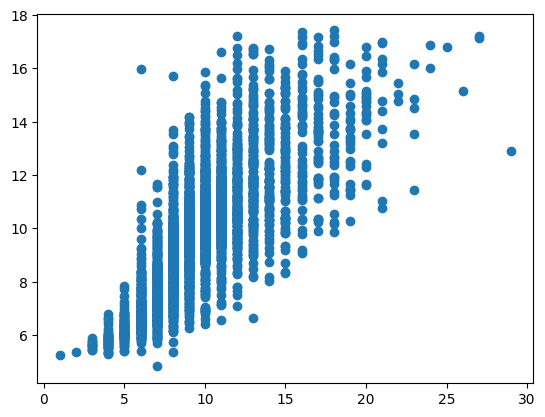

In [25]:
y_train_pred = model.predict(X_train)
plt.scatter(y_train, y_train_pred)
plt.show()

Text(0, 0.5, 'Predictions')

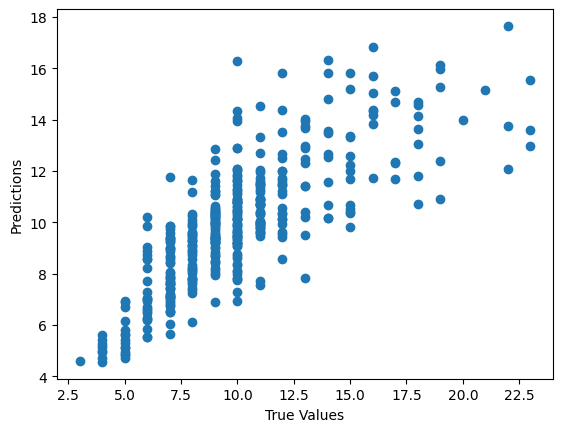

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

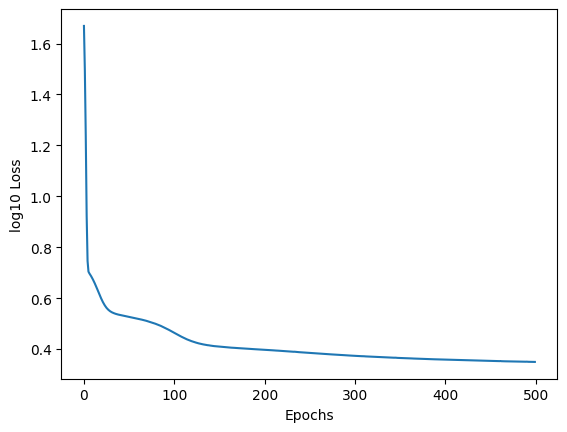

In [22]:
# loss over epochs
log_loss = np.log10(model.loss_curve_)

plt.plot(log_loss)

plt.xlabel('Epochs')
plt.ylabel('log10 Loss')
plt.show()

In [26]:
mlp = MLPRegressor(random_state=seed)
param_grid = {
    'hidden_layer_sizes': [(20, 3), (37, 3), (50, 3), (100,), (100, 50)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'learning_rate_init': [0.0001, 0.001, 0.01],
    'alpha': [0.0001, 0.01, 0.1],
    'max_iter': [1000],
    'learning_rate': ['constant', 'adaptive'],
    'early_stopping': [True],
}

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

/home/vhrollo/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vhrollo/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vhrollo/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vhrollo/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
